In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Reading stock data from yahoo
from pandas_datareader import data

# Time stamps
from datetime import datetime

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices? 
    5.) What was the correlation between different stocks' daily returns? 
    6.) How much value do we put at risk by investing in a particular stock?
    7.) How can we attempt to predict future stock behavior?


In [2]:
# Creating a list of the tech stocks to be used for this analysis.
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setting up the Start and End times for the data to be grabbed
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for retreiving Yahoo finance data via Pandas, setting as df

for stock in tech_list:
    # Set the DF as the 4 str Stock tickers from tech_list
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [3]:
# Summary statistics of the AAPL stock dataframe
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,295.477233,288.454348,291.587035,292.371304,3.609225e+07,290.898655
std,59.066826,57.504537,58.204925,58.510367,1.724549e+07,58.986578
min,205.139999,199.669998,203.460007,201.740005,1.165440e+07,199.758026
25%,255.520004,242.880005,247.419998,247.740005,2.459230e+07,246.316086
50%,286.440002,279.950012,282.279999,284.429993,3.138050e+07,283.151611
75%,323.440002,318.000000,320.750000,320.299988,4.169890e+07,318.860352
max,464.170013,455.709991,459.320007,460.040009,1.067212e+08,460.040009


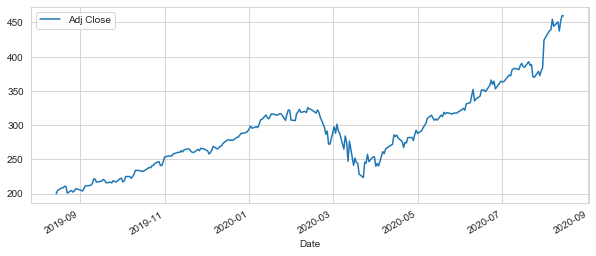

In [4]:
# Plotting a historical view of the closing price of the AAPL stock df
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

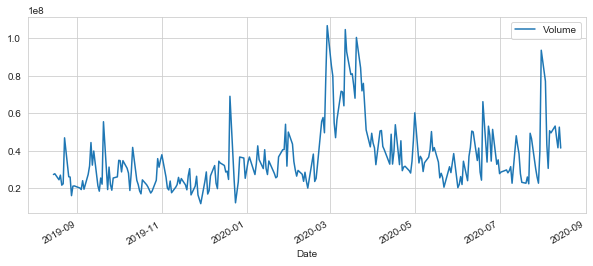

In [5]:
# Plotting the total volume of stocks being traded each day 
AAPL['Volume'].plot(legend=True, figsize=(10,4))

With the visualizations for the closing price and volume traded each day, we will proceed to calculate the moving average for the stock.

<b>Moving Average (MA)</b>: a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

    A Moving Average is a stock indicator that helps smooth out the price data by creating a constantly updated Average Price.

    The Moving Average mitigates the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame.

In [6]:
# Utilizing pandas built-in rolling mean calculator to get MA

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

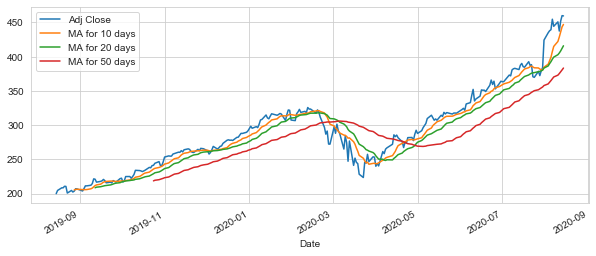

In [7]:
# Plotting all of the Moving Averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

The Moving Average of the AAPL stock over the lasy year, broken down by x days.

Moving forward, let's analyze the risk of the stock.

First, we'll need to look at the daily changes of the stock.

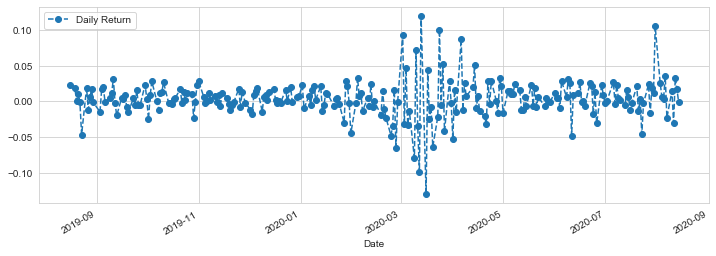

In [8]:
# Utilizing the pandas pct_change function, we'll find the percent change
# for each day based on the Adj Close price.
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Plotting the daily return percentage.
AAPL['Daily Return'].plot(legend=True, figsize=(12,4), 
                          linestyle='--', marker='o')

We can observe that the daily return of Apple stock was extremely volatile during the period between March and May. This was likely due to the stock market crash during the 2020 Covid-19 pandemic and subsequent political stances taken by the U.S. administration (since no new Apple products were released at the time).

<b>The Daily Return Percentage. </B>

Next, let's take an overall look at the average daily return using a histogram using seaborn to create both a histogram and KDE plot on the same figure

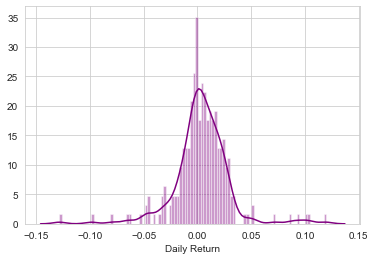

In [9]:
# Use dropna() to get rid of NaN values for seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

# Alternatively: AAPL['Daily Return'].hist()

Histogram and KDE plot of the AAPL Daily Returns

Moving on, let's analyze the returns of all the stocks in the list we previously grabbed by creating a DF with all of the 'Close' columns from eachs stocks dfs.

In [10]:
# Grabbing all closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'],
                            'yahoo', start, end)['Adj Close']

In [11]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-15,199.758026,1167.260010,132.494751,1776.119995
2019-08-16,204.471252,1177.599976,134.923050,1792.569946
2019-08-19,208.283447,1198.449951,137.182831,1816.119995
2019-08-20,208.293350,1182.689941,136.043015,1801.380005
2019-08-21,210.550949,1191.250000,137.559433,1823.540039


With the above closing prices on one DataFrame, let's go ahead and get the daily return for all of the stocks.

In [12]:
# Creating a new all stock returns DataFrame
all_rets = closing_df.pct_change()

Using the daily returns, we can compare the daily percentage return of two stocks to check how they are correlated.

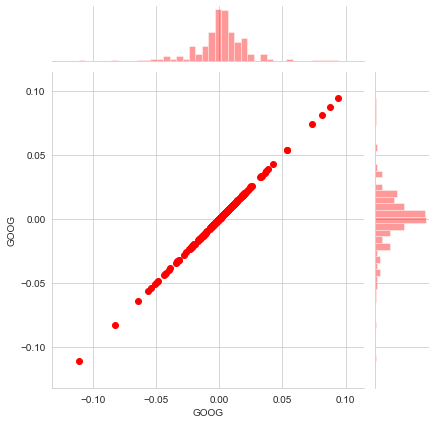

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', all_rets, kind='scatter', color='red')

We now have a baseline: if two stocks a perfectly and positively correlated with each other, a linear relationship between its daily return values should occur.

Let's observe the relationship between the Google and Microsoft stocks.

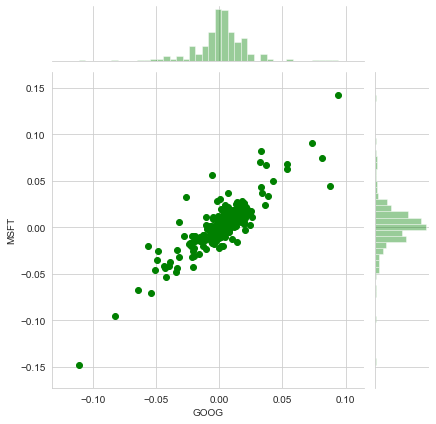

In [14]:
# Again, using jointplot to compare the daily returns of GOOG & MSFT
sns.jointplot('GOOG', 'MSFT', all_rets, kind='scatter', color='green')

This relationship almost looks linear. Let's look at the Pearson product-moment correlation coefficient through the Scipy Stats library.

In [15]:
from scipy import stats

In [16]:
stats.pearsonr(all_rets['GOOG'].dropna(), all_rets['MSFT'].dropna())

(0.8676986355572971, 7.455789447676325e-78)

The Pearson product-moment correlation coefficient between the Google and Microsoft daily returns is 0.87, which indicates a strong, but not total, positive linear correlation.

Utilizing Seaborn and Pandas to easily repeat comparison analysis for every possible combination of stocks in our technology stock ticker list.

We can use sns.pairplot() to automatically create this plot.

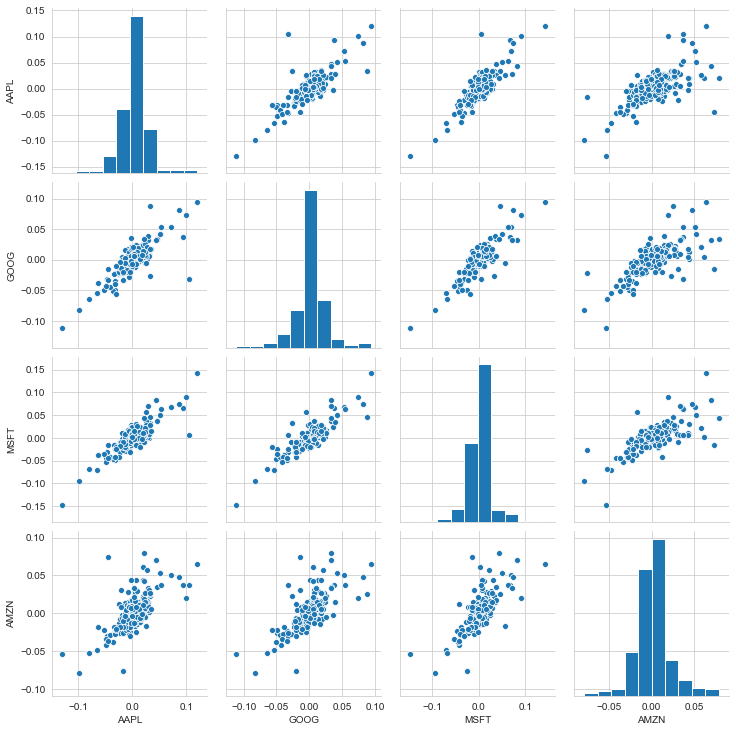

In [17]:
# Simply call sns.pairplot() on our Daily Returns DataFrame for 
# an automatic visual analysis of all the comparisons.
sns.pairplot(all_rets.dropna())

Utilizing pairplot() has given us a quick glance at the relationships on daily returns between all of the stocks.

A cursory glance shows that all of these stocks should have moderate-to-positive correlation. 


We can also use sns PairGrid() for full control of the figure, including what kind of plots go in the diagonal.

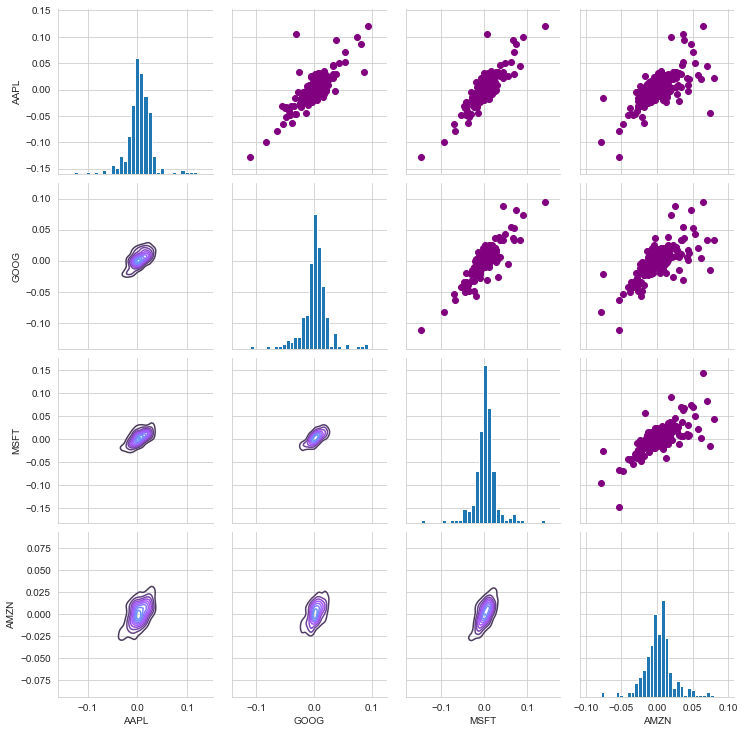

In [18]:
# Setting up our figure.
returns_fig = sns.PairGrid(all_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle in the lower figure, to be a KDE
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally, define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

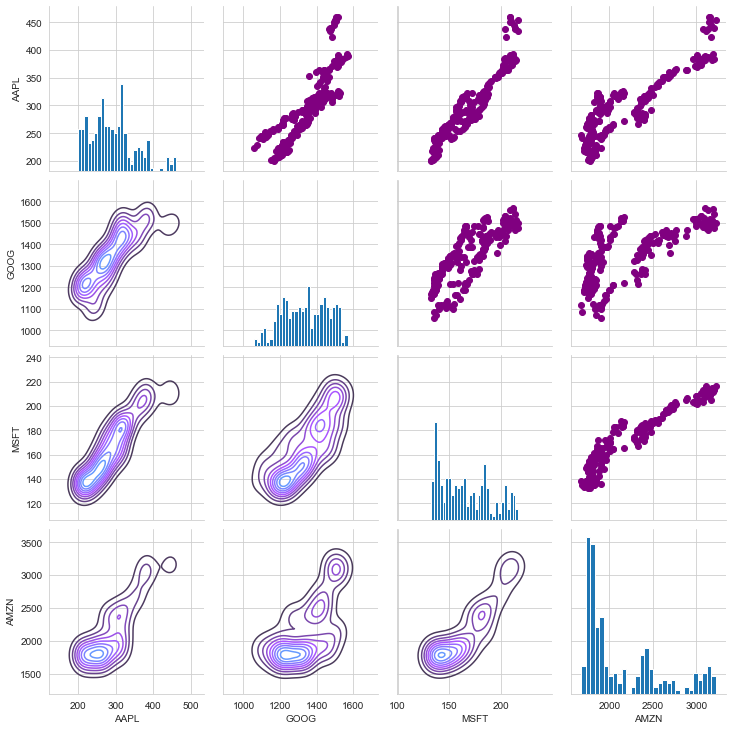

In [19]:
# Plotting similarly for the tech stocks' closing prices

# Setting up our figure.
closing_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
closing_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle in the lower figure, to be a KDE
closing_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally, define the diagonal as a series of histogram plots of the closing price
closing_fig.map_diag(plt.hist, bins=30)

Finally, we can also do a correlation plot to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we may uncover additional interesting relationships.

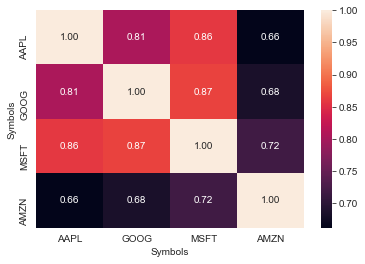

In [20]:
# Utilizing pandas corr() and seaborn heatmap to plot correlation
all_rets_corr= all_rets.dropna().corr()

sns.heatmap(all_rets_corr, annot=True, fmt='.2f')
plt.show()

From this correlation plot (via heatmap), we can see that the correlation between Google and Microsoft, and Apple and Microsoft are the greatest.
    
    We might observe that this is because these tech companies are more linked in their relationships due to the nature of their businesses as phone and application developers.
    
From this correlation plot, we can also observe that all relationships between the tech stocks in our stock ticker are at least moderately positively correlated.

Moving onto actual risk analysis.

<b> Risk Analysis </b>

One of the most basic ways to quantify risk, using the information that we've gathered, is by comparing the expected return with the standard deviation of the daily returns.

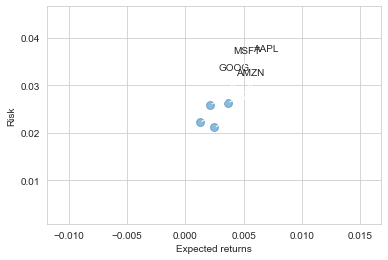

In [21]:
# Define a clean, non-NaN containing DataFrame of all returns
rets = all_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s=area)

# Setting the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords='offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = -0.3'))

<b> Value at Risk </b>

Let's define a value at risk parameter for our stocks. We may treat value at risk as the amount of money we could expect to lose (aka putting at risk), for a given <i> confidence interval</i>. 

<b> Value at Risk using the <u>"bootstrap"</u> method </b>

For this method, we will calculate the empirical quantities from a histogram of daily returns.

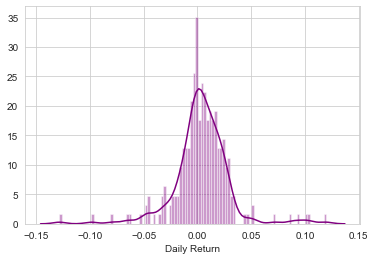

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

Now we can use <i> quantile </i> to get the risk value for the stock.

In [23]:
# Retreiving 0.05 empirical quantile of the Apple stock's daily returns.
rets['AAPL'].quantile(0.05)

-0.03425842644096377

The 0.05 <i> empirical quantile </i> of daily returns for Apple is at -0.034.

That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = 34,000.

In [24]:
# Retreiving 0.05 empirical quantile of the Google stock's daily returns.
rets['GOOG'].quantile(0.05)

-0.03623178060631123

The 0.05 empirical quantile of daily returns for Google is at -0.036.

That means that with 95% confidence, our worst daily loss will not exceed 3.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.036 * 1,000,000 = 36,000.


In [25]:
# Retreiving 0.05 empirical quantile of the Microsoft's daily returns.
rets['MSFT'].quantile(0.05)

-0.03643093718794933

The 0.05 empirical quantile of daily returns for Microsoft is at -0.036.

That means that with 95% confidence, our worst daily loss will not exceed 3.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.036 * 1,000,000 = 36,000.


In [26]:
# Retreiving 0.05 empirical quantile of the Amazon stock's daily returns.
rets['AMZN'].quantile(0.05)

-0.02763362405276297

The 0.05 empirical quantile of daily returns for Amazon is at -0.028.

That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = 28,000.

The Amazon stock is, based on these simple calculations, the safest of daily available options.

<b>Value at Risk using the <u>Monte Carlo</u> method</b>

Using the Monte Carlo to run many trials with random market conditions, which we will then calculate the portfolio losses for each trial. Afterwards, we will use the aggregation of all of these simulations to establish how risky the stock is.

More specifically:
    
    We will use the geometric Brownian motion (GBM), aka a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH); past price information is already incorporated and the net price movement is "conditionally independent" of past price movements.
    
    This means that the past information on the price of a stock is independent of where the stock price will be in the future.
        
        More specifically, one <i><u>cannot</u> perfectly predict the future solely based on the previous price of a stock.</i>
  
    The equation for geometric Brownian motion is given by the following:
        
        ΔS/S = μΔt + σϵ√Δt
        
        S is the stock price, mu is the expected return, sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.
    
    Simplifying:
        
        ΔS = S(μΔt+σϵ√Δt)
        
    Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

Demonstrating a basic Monte Carlo method with just a few simulations.

In [27]:
# Time horizon
days = 365

# Delta
dt = 1/days

# Grabbing our mu (drift) from the expected return data we got
mu = rets.mean()['GOOG']

# Grabbing the volatility of the stock from the std() of the average returns.
sigma = rets.std()['GOOG']

Create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated from our daily returns.

In [28]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        # Calculate Drift
        drift[x] = mu * dt
        
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

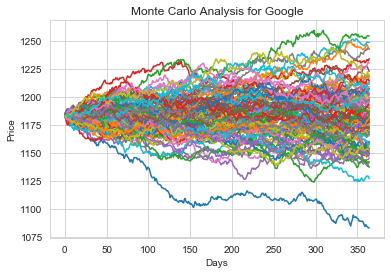

In [29]:
# Take a look at GOOG.head() for the start/open price
start_price =  	1182.83

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')

The Monte Carlo Analysis for Google. 100 runs of 365 days of stocks.

Moving on, let's get a histogram of the end results for a much larger run.

In [30]:
runs = 10000

# Empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array
np.set_printoptions(threshold=5)

for run in range(runs):
    # set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Plot the histogram using the above data points from our 1000 run simulation.

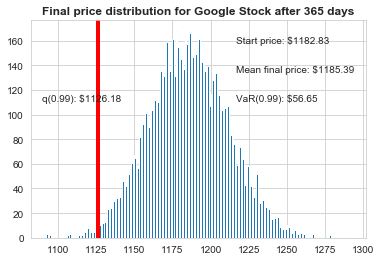

In [31]:
# Define 'q' as the 1% empirical quantile (99% confidence interval)
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins = 200)

# Starting price text
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price text
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(start_price -q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days,
         weight='bold');

Based on our calculations, the Value at Risk for the Google stock looks to be $56.65 for every investment of 1182.83 (the price of one initial Google stock)

This means for every initial stock you purchase, you are putting about $56.65 at risk 99% of the time from our Monte Carlo Simulation.

Switching gears, let us take a look at the Food industries' stock market.

We will be looking at Kellog (K), Coca-cola Co. (KO), Pepsi Co. (PEP), and Keurig Dr Pepper (KDP).

In [32]:
food_list = ['K', 'KO', 'PEP', 'KDP']

# Setting up the Start and End times for the data to be grabbed
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for retreiving Yahoo finance data via Pandas, setting as df

for stock in food_list:
    # Set the DF as the 4 str Stock tickers from food_list
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [33]:
# Retreive the closing prices of the food stocks
food_closing_df = data.DataReader(['K', 'KO', 'PEP', 'KDP'],
                                'yahoo', start, end)['Adj Close']

# The daily returns of all food stocks
food_rets = food_closing_df.pct_change()

In [34]:
f_rets = food_rets.dropna()

# Time horizon
days = 365

# Delta
dt = 1/days

# Analyzing the Risk at Value of KO (Coca-cola Co.)

# Grabbing our mu (drift) from the expected return data we got
mu = f_rets.mean()['KO']

# Grabbing the volatility of the stock from the std() of the average returns.
sigma = f_rets.std()['KO']

In [35]:
starting_price = 53.790001

runs = 10000

# Empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array
np.set_printoptions(threshold=5)

for run in range(runs):
    # set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(starting_price,days,mu,sigma)[days-1]

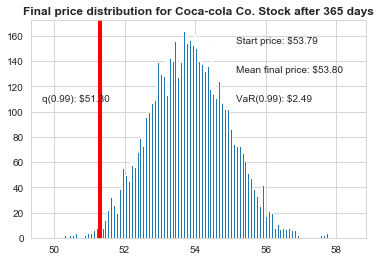

In [36]:
# Define 'q' as the 1% empirical quantile (99% confidence interval)
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins = 200)

# Starting price text
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %starting_price)

# Mean ending price text
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(starting_price -q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Coca-cola Co. Stock after %s days" % days,
         weight='bold');

Based on our calculations, the Value at Risk for the Coca-cola Co. stock looks to be $2.49 for every investment of 53.79 (the price of one initial Coca-cola Co. stock)

This means for every initial stock you purchase, you are putting about $2.49 at risk 99% of the time from our Monte Carlo Simulation.


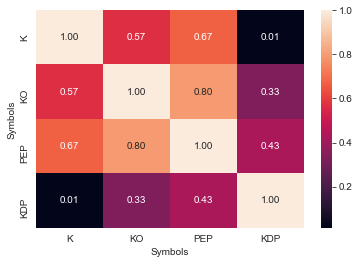

In [37]:
# Utilizing pandas corr() and seaborn heatmap to plot correlation
food_rets_corr= f_rets.corr()

sns.heatmap(food_rets_corr, annot=True, fmt='.2f')
plt.show()

Based on the correlation map we have plotted, it is interesting to note that the Kellog (K) and Keurig Dr Pepper (KDP) stocks have almost zero correlation.

    It might be interesting to further observe the relationship between Kellog and Keurig Dr Pepper. One might assume that a cereal-producer and coffee-beverage producer might have a stronger positive correlation than the above plot suggests.
    
As our intuition would predict, the Coca-cola Co. and Pepsi stocks have the strongest positive correlation, likely because they are selling <i> differentiated </i> products (products that appear to be different, but serve a similar purpose). These products are viewed as horizontally differentiated, meaning their prices are similar and the consumers' personal perference is the defining factor in which product is selected.

We can also observe that there are no negative correlations.



In [38]:
# Observing the Pearson correlation of K and KDP
stats.pearsonr(f_rets['K'], f_rets['KDP'])

(0.012783373130684936, 0.8399721460905178)

Again, the Pearson correlation between Kellog and KDP are extremely low, just barely technically positive in correlation.

In [39]:
# Observing the Spearman correlation
stats.spearmanr(f_rets['K'], f_rets['KDP'])

SpearmanrResult(correlation=0.23244800441524438, pvalue=0.00019704684510966517)

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

        It can take a real value in the range −1 ≤ ρ ≤ 1.

        Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.

        Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.


Again, the Spearman's rho of closing price for Kellog and Keurig Dr Pepper suggests a minimally monotonically increasing relationship between these two stocks.

In [40]:
import scipy.stats

# X-Y Plots with a regression line
slope, intercept, r, p, stderr = scipy.stats.linregress(f_rets['K'], f_rets['KDP'])

In [41]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=0.00+0.02x, r=0.01'

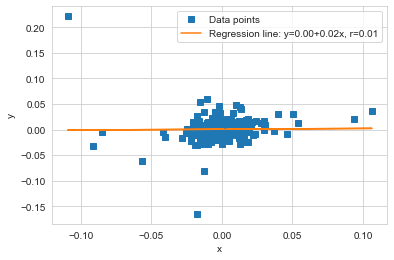

In [42]:
fig, ax = plt.subplots()
ax.plot(f_rets['K'], f_rets['KDP'], linewidth=0, marker='s', label='Data points')
ax.plot(f_rets['K'], intercept + slope * f_rets['K'], label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()


Again, based on our X-Y Plot with a linear regression line using Kellog as our X, and Keurig Dr Pepper as our Y, there seems to be a very weak positive correlation, at best.